First 5 rows of the dataset:
  Application_ID  Gender  Age Marital_Status      Education Employment_Type  \
0        APP1000    Male   44         Single            PhD   Self-Employed   
1        APP1001  Female   31         Single    High School        Salaried   
2        APP1002    Male   28        Married  Post-Graduate      Unemployed   
3        APP1003    Male   56        Married       Graduate   Self-Employed   
4        APP1004    Male   58       Divorced    High School   Self-Employed   

   Annual_Income  Loan_Amount Loan_Purpose  Credit_Score  Loan_Term_Months  \
0         718349       899881         Home         643.0                72   
1         984838       684122    Education         639.0                24   
2         997968       810674         Home         690.0                24   
3        1801405       503449    Education         737.0                72   
4         279083       337681     Personal         629.0                60   

  Loan_Status Application_D

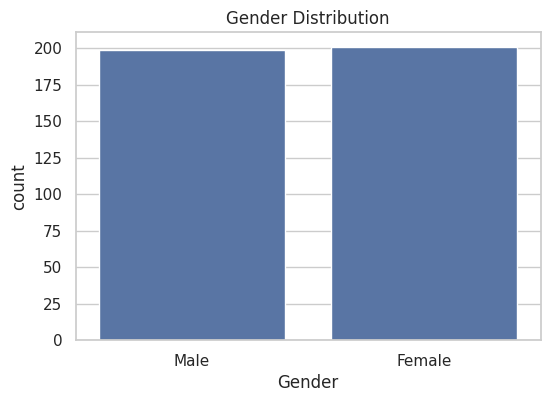

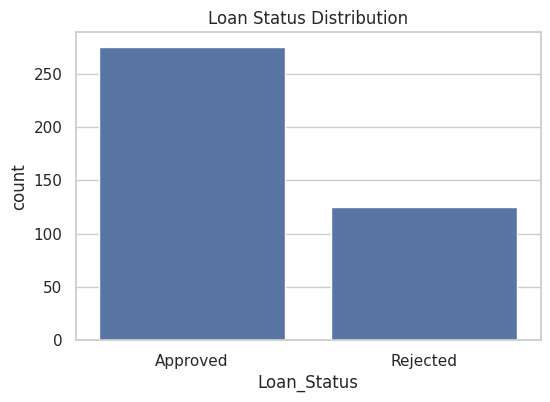

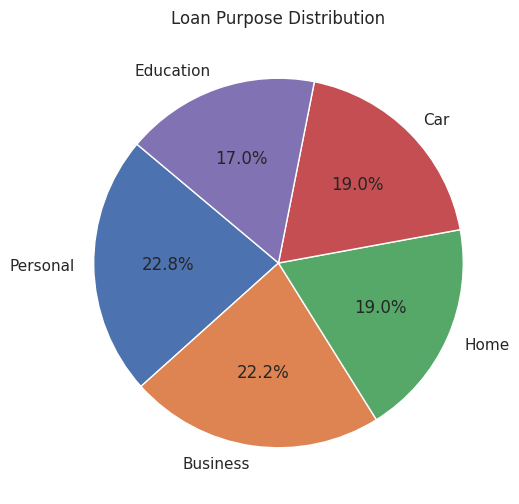

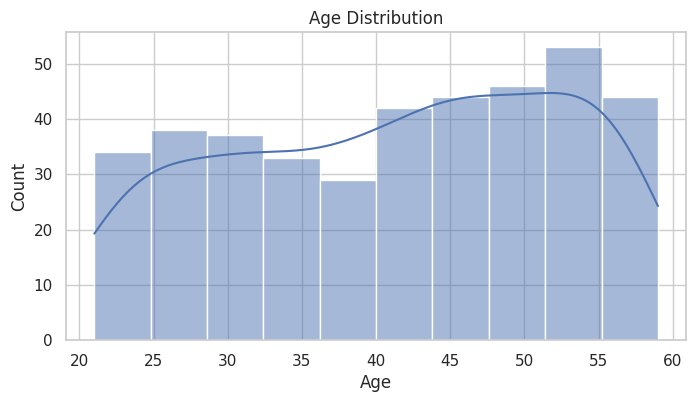

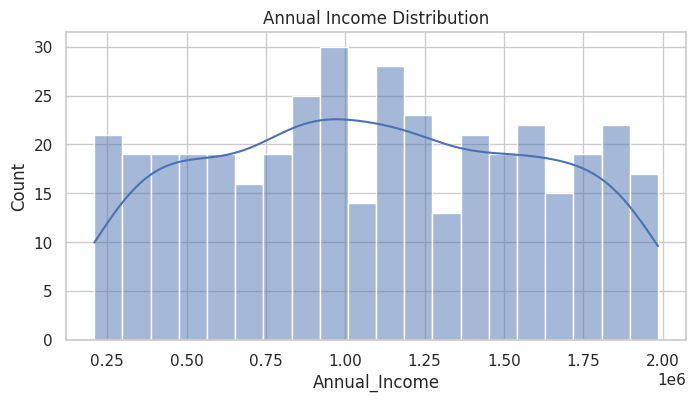

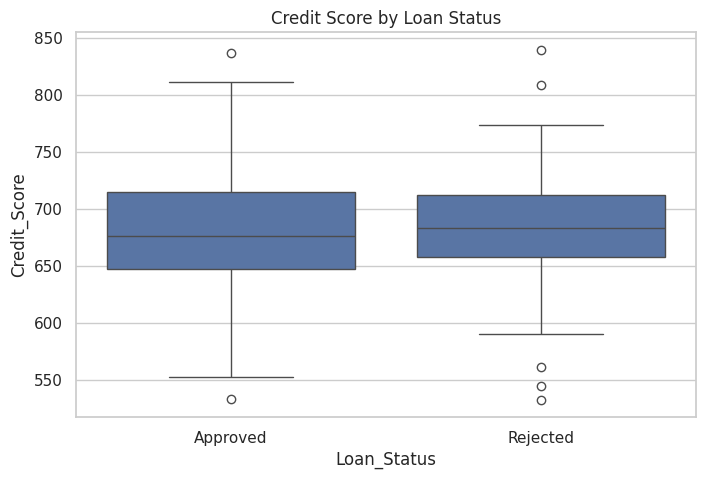

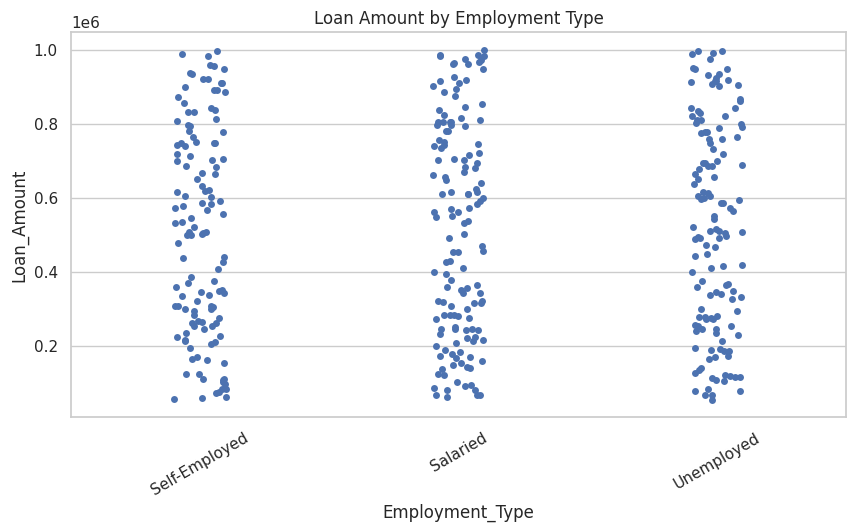

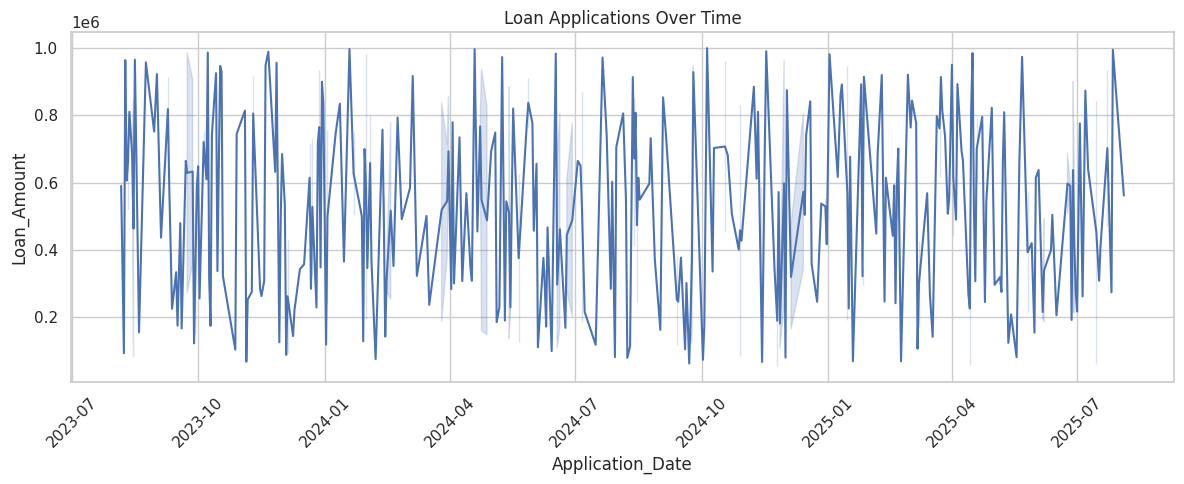

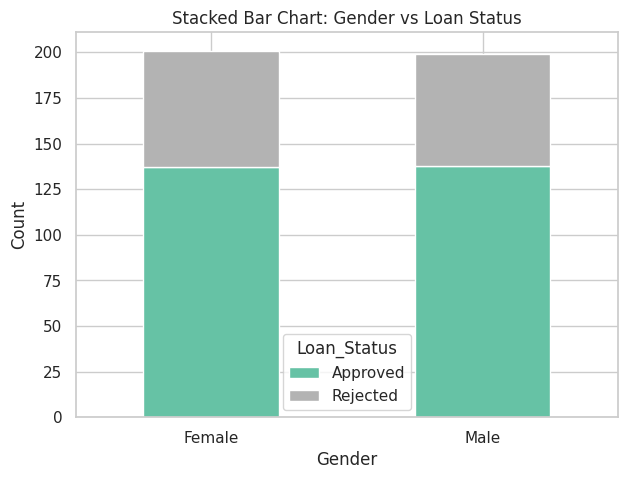

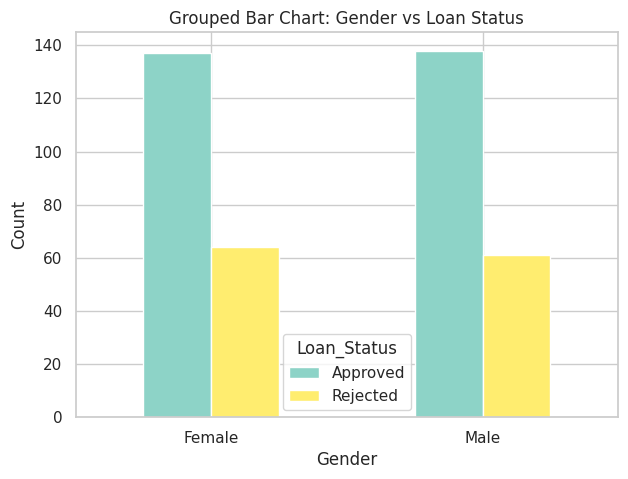

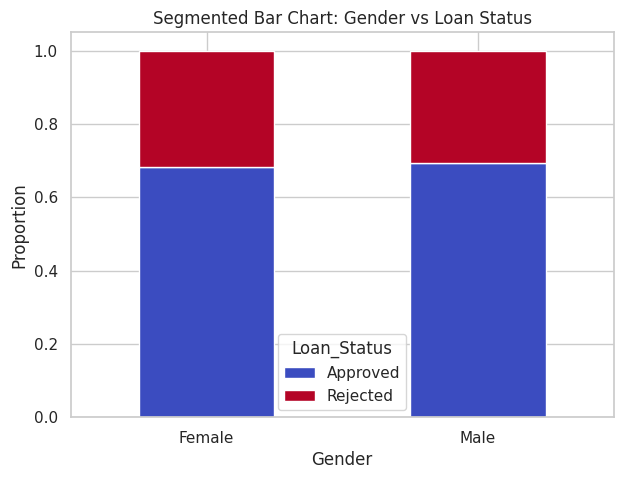

<Figure size 800x600 with 0 Axes>

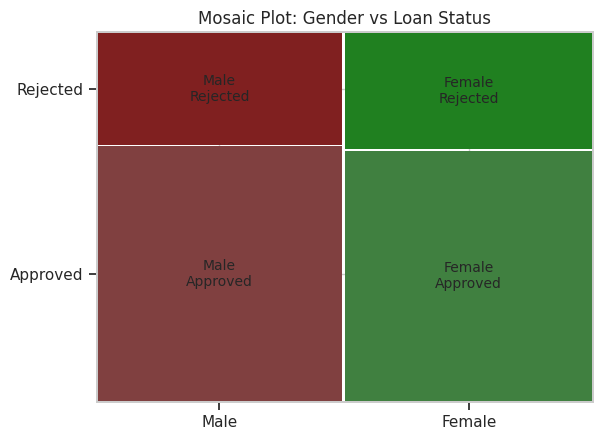

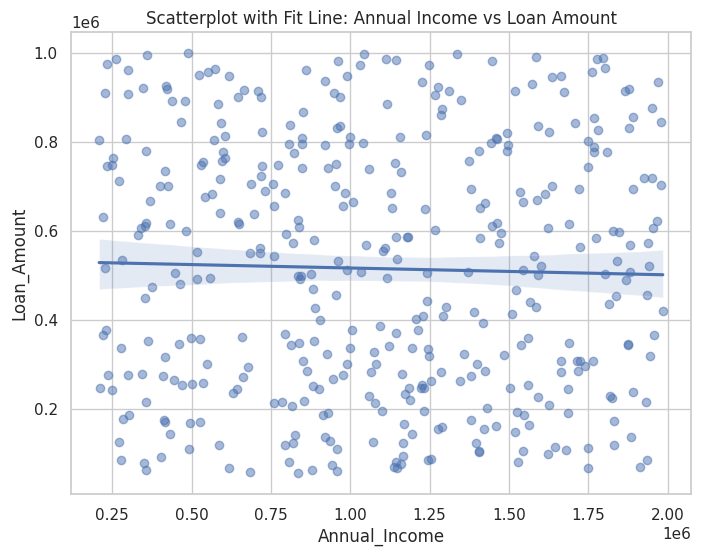

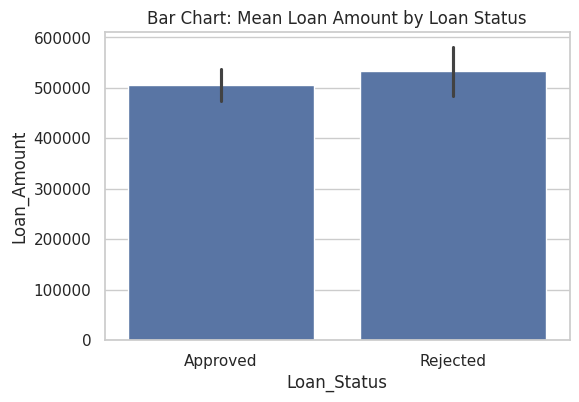

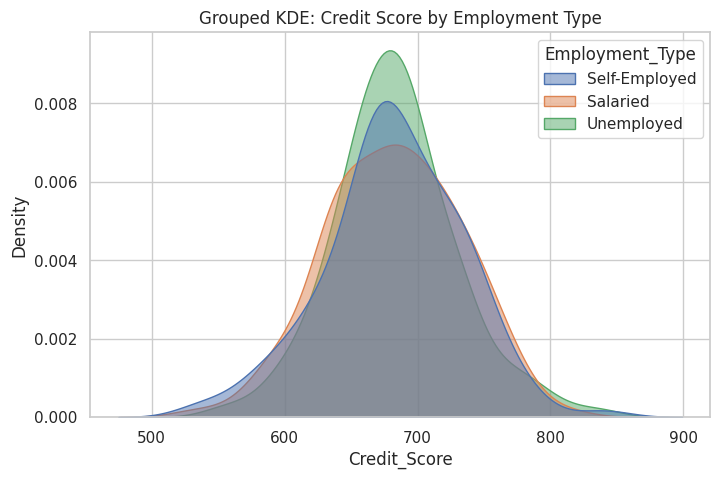

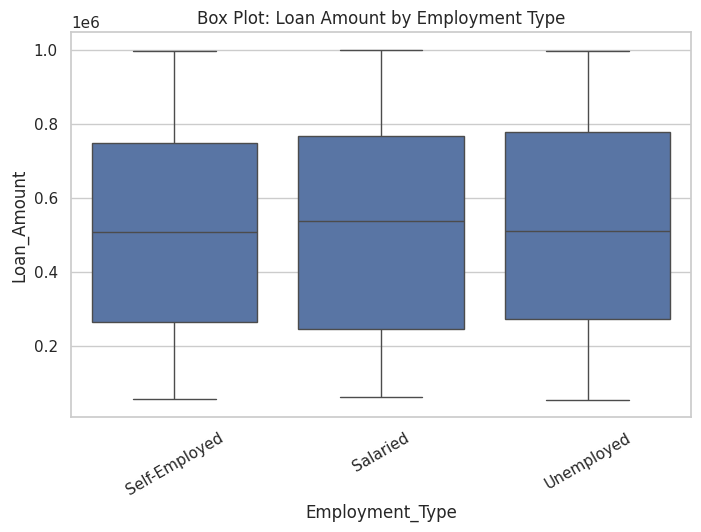

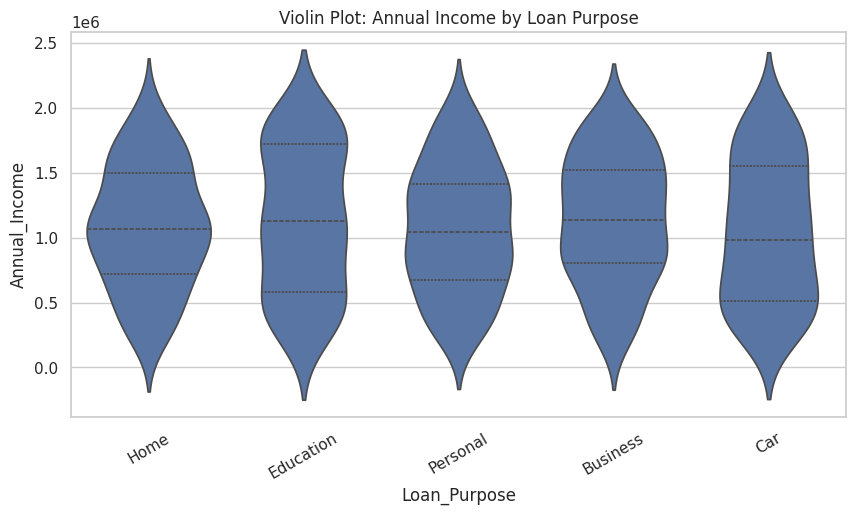

Install joypy with: !pip install joypy


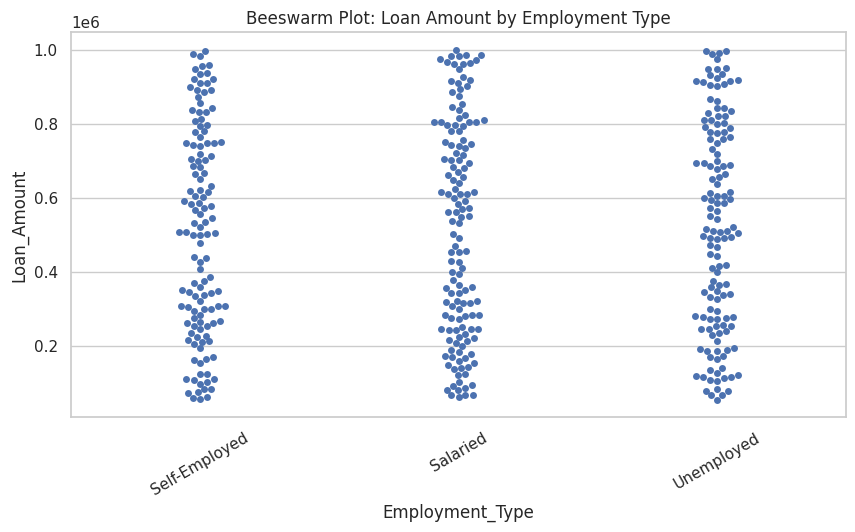

In [ ]:
# -----------------------------------------
# STEP 1: IMPORT LIBRARIES
# -----------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

sns.set(style="whitegrid")

# -----------------------------------------
# STEP 2: READ THE UPLOADED FILE
# -----------------------------------------
# Make sure you've uploaded 'banking_loan_applications.csv' manually to /content
df = pd.read_csv("banking_loan_applications.csv")

# -----------------------------------------
# STEP 3: PREVIEW & CLEANING
# -----------------------------------------
print("First 5 rows of the dataset:")
print(df.head())

# Convert to datetime
df['Application_Date'] = pd.to_datetime(df['Application_Date'], errors='coerce')

# Missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Data types
print("\nData types of each column:")
print(df.dtypes)

# -----------------------------------------
# STEP 4: UNIVARIATE ANALYSIS
# -----------------------------------------

# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.show()

# Loan Status
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Loan_Status')
plt.title("Loan Status Distribution")
plt.show()

# Loan Purpose
plt.figure(figsize=(6, 6))
df['Loan_Purpose'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title("Loan Purpose Distribution")
plt.ylabel('')
plt.show()

# Age
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Age Distribution")
plt.show()

# Annual Income
plt.figure(figsize=(8, 4))
sns.histplot(df['Annual_Income'], bins=20, kde=True)
plt.title("Annual Income Distribution")
plt.show()

# Credit Score by Loan Status
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Loan_Status', y='Credit_Score')
plt.title("Credit Score by Loan Status")
plt.show()

# Loan Amount by Employment Type
plt.figure(figsize=(10, 5))
sns.stripplot(data=df, x='Employment_Type', y='Loan_Amount', jitter=True)
plt.title("Loan Amount by Employment Type")
plt.xticks(rotation=30)
plt.show()

# Loan Applications Over Time
df_sorted = df.sort_values('Application_Date')
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_sorted, x='Application_Date', y='Loan_Amount')
plt.title("Loan Applications Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------------------
# STEP 5: BIVARIATE ANALYSIS
# -----------------------------------------

# --- CATEGORICAL vs CATEGORICAL ---
ct = pd.crosstab(df['Gender'], df['Loan_Status'])

# Stacked Bar Chart
ct.plot(kind='bar', stacked=True, figsize=(7,5), colormap='Set2')
plt.title("Stacked Bar Chart: Gender vs Loan Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Grouped Bar Chart
ct.plot(kind='bar', stacked=False, figsize=(7,5), colormap='Set3')
plt.title("Grouped Bar Chart: Gender vs Loan Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Segmented Bar Chart
segmented = ct.div(ct.sum(axis=1), axis=0)
segmented.plot(kind='bar', stacked=True, figsize=(7,5), colormap='coolwarm')
plt.title("Segmented Bar Chart: Gender vs Loan Status")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()

# Mosaic Plot
plt.figure(figsize=(8,6))
mosaic(df, ['Gender', 'Loan_Status'])
plt.title("Mosaic Plot: Gender vs Loan Status")
plt.show()

# --- CONTINUOUS vs CONTINUOUS ---
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='Annual_Income', y='Loan_Amount', scatter_kws={'alpha':0.5})
plt.title("Scatterplot with Fit Line: Annual Income vs Loan Amount")
plt.show()

# --- CATEGORICAL vs CONTINUOUS ---

# Bar chart: Mean Loan Amount by Loan Status
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Loan_Status', y='Loan_Amount')
plt.title("Bar Chart: Mean Loan Amount by Loan Status")
plt.show()

# KDE Plot: Credit Score by Employment Type
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='Credit_Score', hue='Employment_Type', fill=True, common_norm=False, alpha=0.5)
plt.title("Grouped KDE: Credit Score by Employment Type")
plt.show()

# Box Plot: Loan Amount by Employment Type
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Employment_Type', y='Loan_Amount')
plt.title("Box Plot: Loan Amount by Employment Type")
plt.xticks(rotation=30)
plt.show()

# Violin Plot: Annual Income by Loan Purpose
plt.figure(figsize=(10,5))
sns.violinplot(data=df, x='Loan_Purpose', y='Annual_Income', inner='quartile')
plt.title("Violin Plot: Annual Income by Loan Purpose")
plt.xticks(rotation=30)
plt.show()

# Ridgeline Plot
try:
    import joypy
    plt.figure(figsize=(8,6))
    joypy.joyplot(df, by='Loan_Status', column='Credit_Score', figsize=(8,5), colormap=plt.cm.Set3)
    plt.title("Ridgeline Plot: Credit Score by Loan Status")
    plt.show()
except:
    print("Install joypy with: !pip install joypy")

# Beeswarm Plot: Loan Amount by Employment Type
plt.figure(figsize=(10,5))
sns.swarmplot(data=df, x='Employment_Type', y='Loan_Amount')
plt.title("Beeswarm Plot: Loan Amount by Employment Type")
plt.xticks(rotation=30)
plt.show()
